<a href="https://colab.research.google.com/github/adityaambati/cs666student/blob/main/CS666_Assignment_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

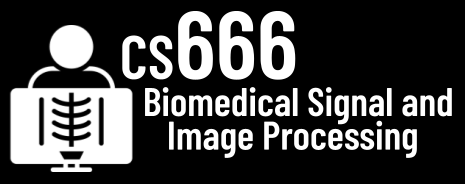
# Assignment 6

In [14]:
# NAME: Aditya Ambati

In [15]:

# In this assignment, we will explore the new Segment-Anything-Model (https://segment-anything.com/)
# for the task of mitochondria detection in a connectomics dataset acquired using electron microscopy.
#
# We will run the following experiments:
#
# 1. Using the Segment-Anything-Model (SAM) without seeds in auto mode
#
# 2. Train a U-Net classifier from scratch
#
# 3. Evaluate the U-Net classifier
#
# 4. Use the U-Net to seed the SAM model (U-Net + SAM)
#
# 5. Compare U-Net vs. U-Net + SAM
#
# Bonus: Improve U-Net + SAM

In [16]:
### IMPORTANT (DO THIS RIGHT AWAY!) ###
#
# Activate GPU support: Runtime -> Change Runtime Type
# Hardware Accelerator: GPU
#
### IMPORTANT ###

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
# We will use mahotas as well!
!pip install mahotas --no-binary :all:
import mahotas as mh

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# And of course, we need the data!
!wget https://cs666.org/data/mito.npz

--2023-04-25 03:49:09--  https://cs666.org/data/mito.npz
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37610178 (36M) [application/octet-stream]
Saving to: ‘mito.npz’

mito.npz            100%[===================>]  35.87M   174MB/s    in 0.2s    

2023-04-25 03:49:09 (174 MB/s) - ‘mito.npz’ saved [37610178/37610178]



## 0. Data loading (5 points)

In [20]:
# The data includes images and manually segmented masks.
loaded = np.load('mito.npz')
images = loaded['arr_0'][0]
masks = loaded['arr_0'][1]

In [21]:
# TODO: Show the first image with the gray colormap.
# TODO: YOUR_CODE
# TODO: Show the first image with the gray colormap.


In [22]:
len(images)

660

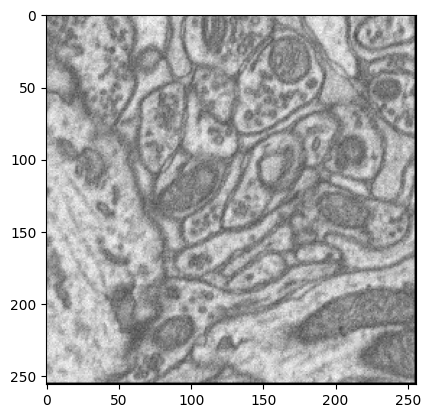

In [23]:
plt.imshow(images[0], cmap='gray')
plt.show()

In [24]:
# TODO: Show the first mask.

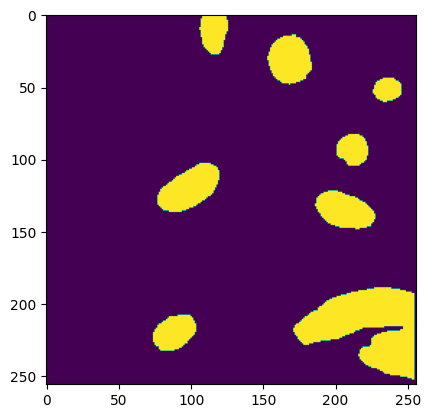

In [25]:
plt.imshow(masks[0])
plt.show()

## 1. SAM in AUTO mode (15 points)

In [28]:
# We will use the METASEG package as an easy-to-use layer
# for SAM.
!pip install metaseg==0.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 10.8 MB/s eta 0:00:00
  Created wheel for metaseg: filename=metaseg-0.6.1-py3-none-any.whl size=44772 sha256=72a572e5ddb68b7a559d10f01c0c8b84abd8b480ac0edf3930b8ab473ae72d02
  Stored in directory: /root/.cache/pip/wheels/b1/0c/bd/5e8d8f9aa755ac2f82e75b9391db0d403f760a4654b19c8b6c
Successfully built meta

In [29]:
# SAM comes in two modes, auto and with seeds
from metaseg import SegAutoMaskPredictor, SegManualMaskPredictor

In [30]:
# SAM takes files as input!
# So we have to store the numpy array to disk.
mh.imsave('first.png', images[0])

In [32]:
#
# Run SAM in auto mode on first.png and store
# the result as first_output.png.
#
results = SegAutoMaskPredictor().image_predict(
    source="first.png",
    model_type="vit_l", # vit_l, vit_h, vit_b
    points_per_side=16, 
    points_per_batch=64,
    min_area=0,
    output_path="first_output.png",
    show=False,
    save=True,
)

vit_l model already exists as 'vit_l.pth'. Skipping download.


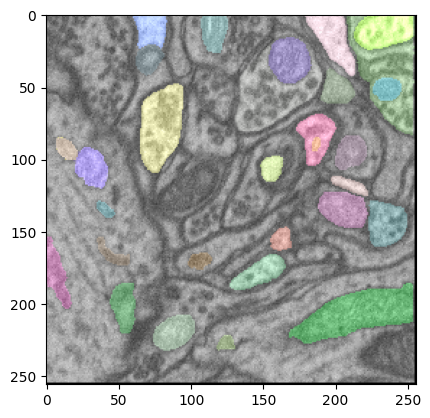

In [33]:
imshow( mh.imread('first_output.png') )

In [34]:
# TODO: Does SAM work well for mitochondria detection?
# TODO: YOUR_ANSWER

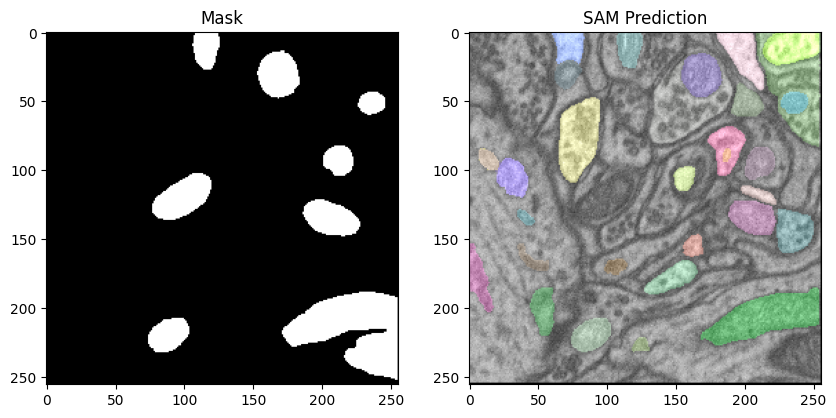

In [35]:

out= mh.imread('first_output.png')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(masks[0], cmap='gray')
ax[0].axis('on')
ax[0].set_title('Mask')

ax[1].imshow(out)
ax[1].axis('on')
ax[1].set_title('SAM Prediction')


plt.show()

Yes, by plotting both the images next to each other we can clearly see that the detection of SAM is more effective when compared to the detection in the corresponding mask from mito.npz. 


In [36]:
# TODO: Try the auto predictor on your image!
# 
# Please upload your own image and test how well
# the auto mode of SAM performs!
#
# Run SAM in auto mode on that image and store
# the result as second_output.png. Show the output!
#

In [37]:
# TODO: YOUR CODE

In [38]:
import gc
gc.collect()

65

In [39]:
results = SegAutoMaskPredictor().image_predict(
    source="myimage.png",
    model_type="vit_l", # vit_l, vit_h, vit_b
    points_per_side=16, 
    points_per_batch=64,
    min_area=0,
    output_path="second_output.png",
    show=False,
    save=True,
)

vit_l model already exists as 'vit_l.pth'. Skipping download.


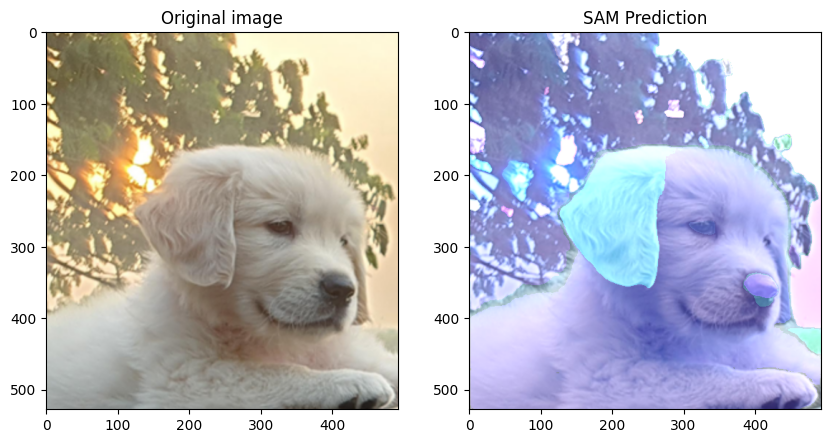

In [40]:

out1= mh.imread('myimage.png')
segmented_1= mh.imread('second_output.png')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(out1)
ax[0].axis('on')
ax[0].set_title('Original image')

ax[1].imshow(segmented_1)
ax[1].axis('on')
ax[1].set_title('SAM Prediction')


plt.show()

In [41]:
# TODO: Does SAM work well on your example?
# TODO: YOUR_ANSWER

I can see the segmentation, but it is not very cleae when compared to the previous segementation of the image. 

## 2. Train a U-Net classifier from scratch (50 points)


In [42]:
# We will use the keras_unet package!
#
# HINT: There is documentation available here, if you are stuck during this part
# of the assignment: https://github.com/karolzak/keras-unet
!pip install keras_unet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# keras_unet has convenience functions to visualize data
from keras_unet.utils import plot_imgs

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


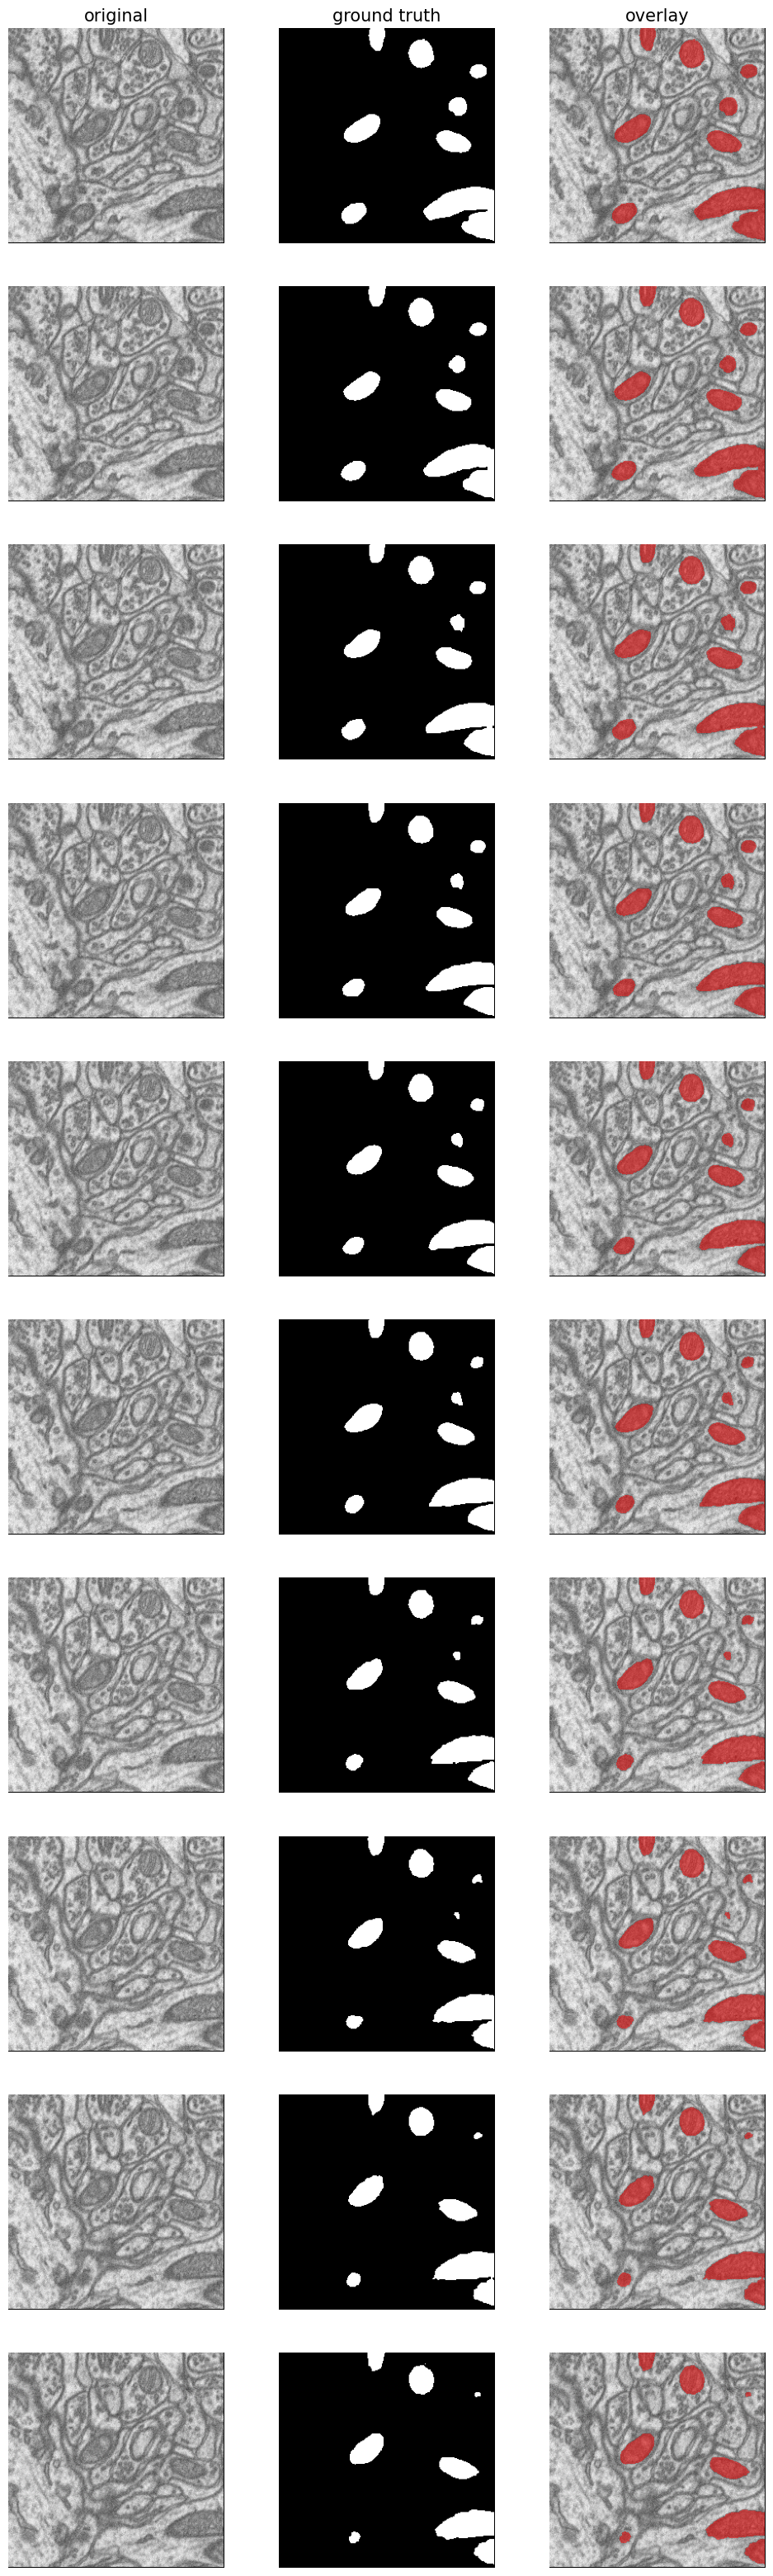

In [44]:
# Let's plot a few images and masks.
plot_imgs(org_imgs=images, mask_imgs=masks)

In [45]:
# The images are in this format.
print( images.shape, images.max(), images.dtype )

(660, 256, 256) 243 uint8


In [46]:
# TODO convert the format to the following:
# (660, 256, 256, 1) 1.0 float32
#
# 1) convert to float32
# 2) normalize to the range of 0..1
# 3) Add the last channel using .reshape like in class
#
# TODO: YOUR_CODE
# X = 

In [47]:
X = images.astype(np.float32)  #float32
X =(X - np.min(X)) / (np.max(X) - np.min(X)) # normalize to the range of 0..1
X= X.reshape(X.shape[0],X.shape[1],X.shape[2],1) # reshape

In [48]:
# Validate that everything matches accordingly
print( X.shape, X.max(), X.dtype )

(660, 256, 256, 1) 1.0 float32


In [49]:
# The masks are in this format.
print( masks.shape, masks.max(), masks.dtype )

(660, 256, 256) 255 uint8


In [50]:
# TODO convert the format to the following:
# (660, 256, 256, 1) True bool
#
# 1) convert to bool
# 2) Add the last channel using .reshape like in class
#
# TODO: YOUR_CODE
# y = 

In [51]:
y = masks.astype(bool)  #bool
y= y.reshape(y.shape[0],y.shape[1],y.shape[2],1) # reshape

In [52]:
# Validate that everything matches accordingly
print( y.shape, y.max(), y.dtype )

(660, 256, 256, 1) True bool


In [53]:
#
# Now we will create our train/val/test splits using scikit-learn!
#
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [56]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (369, 256, 256, 1)
y_train:  (369, 256, 256, 1)
X_val:  (159, 256, 256, 1)
y_val:  (159, 256, 256, 1)
X_test:  (132, 256, 256, 1)
y_test:  (132, 256, 256, 1)


In [57]:
# TODO: Why do we call train_test_split twice?
# TODO: YOUR_ANSWER

We called it twice because, when we called it the first time we dividied the data for training and testing.
X_train, X_test, y_train, y_test

And again when we called it second time we divided the data for training and validatation.
X_train, X_val, y_train, y_val


In [58]:
#
# We will use keras_unet's built-in data augmentation
# functionality.
#
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    X_train, y_train, batch_size=2,
    data_gen_args = dict(
        rotation_range=15.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=50,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    ))

In [59]:
# TODO: Please explain the code from above.
# TODO: YOUR_ANSWER

Here we are training the data with batch size of 2, and for data agumentation we are  using

rotation range of 15

width shift which is vertical translation of range 0.05

Height shift which is Horizontal translation of range 0.05

shear range of 50

zoom range 0.2 which gives a random zooming of image

horizontal and vertical flip of image which set to true that means these can be done.

fill mode deals with the points outside the boundary of input which wil be filled with constant. ( I am not sure about the fill mode )


(2, 256, 256, 1) (2, 256, 256, 1)


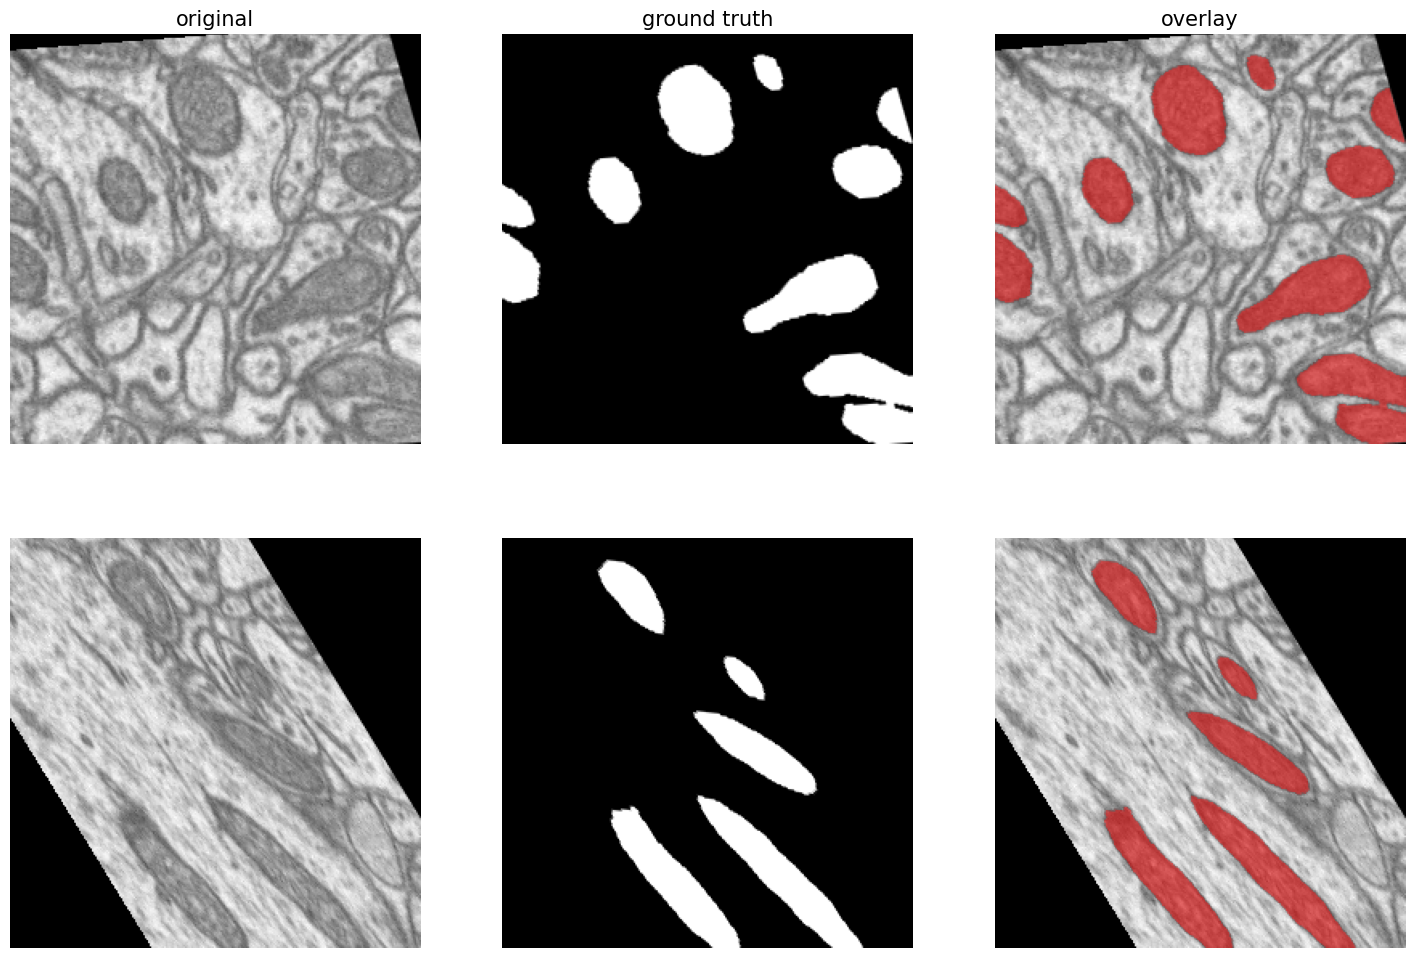

In [60]:
# Run the following code to visualize augmented examples.
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [61]:
#
# Now, we set up a U-Net classifier.
#
from keras_unet.models import custom_unet

model = custom_unet(
    X_train[0].shape,
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid'
)

In [62]:
# TODO: How many  trainable parameters does the model use?
# TODO: YOUR_ANSWER

In [63]:
print (model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 spatial_dropout2d (SpatialDrop  (None, 256, 256, 64  0          ['conv2d[0][0]']                 
 out2D)                         )                                                             

In [64]:
#From above the Trainable params: 31,030,593

In [65]:
#
# Let's compile the model. Please use a LEARNING_RATE of 0.01
# and a MOMENTUM of 0.99.
#
LEARNING_RATE = 0.01
MOMENTUM = 0.99

In [66]:
#
# We will use Stochastic Gradient Descent as optimizer
# and use IoU as a metric.
#
from keras.optimizers import SGD
from keras_unet.metrics import iou, iou_thresholded

model.compile(
    optimizer=SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM),
    loss='binary_crossentropy',
    metrics=[iou, iou_thresholded]
)

In [67]:
# TODO: Please explain Intersect-over-Union (IoU) in just a few sentences.
# TODO: YOUR_ANSWER

Intersect-over-Union (IoU) is used to evaluate the performance of image segmentation models. It is calculated by taking the intersection of the predicted segmentation and the ground truth segmentation and dividing it by the union of the two. IoU ranges between 0 and 1, where 1 indicates a perfect overlap between the predicted and ground truth segmentations, and 0 indicates no overlap.

A higher IoU value indicates better segmentation performance.

ref:https://towardsdatascience.com/iou-a-better-detection-evaluation-metric-45a511185be1

In [68]:
#
# Now let's train the model for 30 epochs!
#
# TODO: Please complete the code below.
# Hint: Don't forget to use the train_gen from above as training data.
# Hint 2: Please don't forget (X_val, y_val) as validation data.
# Hint 3: steps_per_epoch should be set to all of the X_train.
# Hint 4: This will take roughly 30 minutes.
# Hint 5: If you are stuck, look through the repo of keras_unet!
#
history = model.fit(
                    train_gen,
                    steps_per_epoch=len(X_train) // 2,
                    epochs=30,
                    validation_data=(X_val, y_val)                    
)

Epoch 1/30
184/184 [==============================] - 19s 63ms/step - loss: 0.2500 - iou: 0.0423 - iou_thresholded: 1.8143e-04 - val_loss: 0.2690 - val_iou: 0.0364 - val_iou_thresholded: 6.0699e-06
Epoch 2/30
184/184 [==============================] - 4s 20ms/step - loss: 0.1970 - iou: 0.0864 - iou_thresholded: 1.4428e-04 - val_loss: 0.2552 - val_iou: 0.0778 - val_iou_thresholded: 6.0699e-06
Epoch 3/30
184/184 [==============================] - 4s 20ms/step - loss: 0.1733 - iou: 0.1221 - iou_thresholded: 0.0245 - val_loss: 0.1736 - val_iou: 0.2095 - val_iou_thresholded: 0.1170
Epoch 4/30
184/184 [==============================] - 4s 20ms/step - loss: 0.1567 - iou: 0.1778 - iou_thresholded: 0.1241 - val_loss: 0.1855 - val_iou: 0.2128 - val_iou_thresholded: 0.4293
Epoch 5/30
184/184 [==============================] - 4s 20ms/step - loss: 0.1511 - iou: 0.1966 - iou_thresholded: 0.2213 - val_loss: 0.1547 - val_iou: 0.2719 - val_iou_thresholded: 0.3058
Epoch 6/30
184/184 [==================

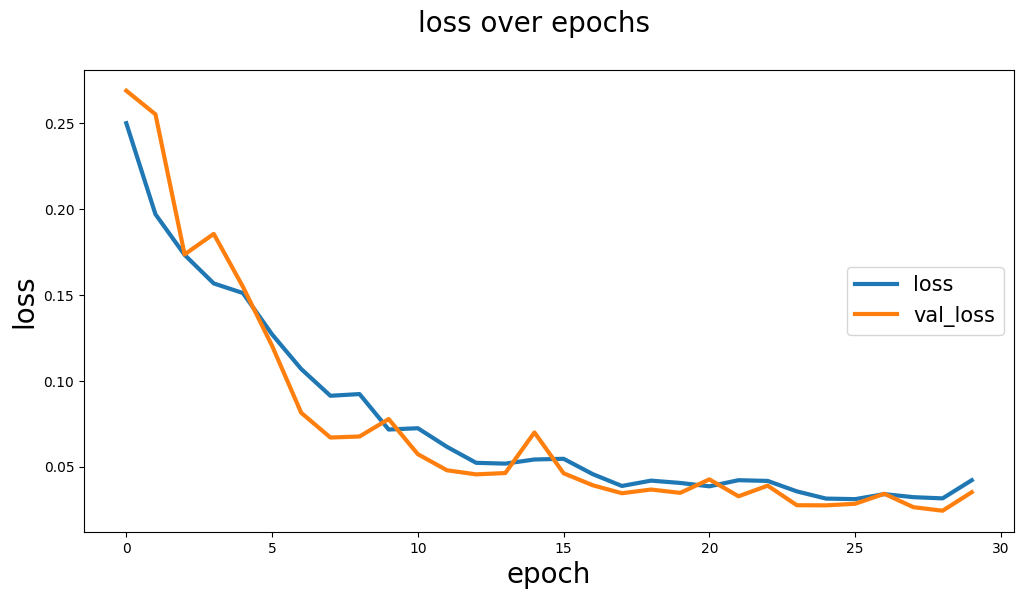

In [69]:
# We can use keras_unet functionality to visualize metrics and loss during training.
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [70]:
# TODO: Do these plots look good to you?
# TODO: YOUR_ANSWER

In the metrics over epochs graph the iou and val_iou values are increasing constantly, and few irregularities are seen in between this can be taken by using methods like regularization or early stopping.

and in the graph loss over epochs graph the iou and val_iou values are decreasing constantly but few irregularities are seen in between, which is  not a good sign of training.

Overall the plots are just okay, but with few techiniques it can be improved.

## 3. Evaluate U-Net (10 points)

In [71]:
# Let's predict all of X_test
y_pred = model.predict(X_test)

5/5 [==============================] - 1s 231ms/step


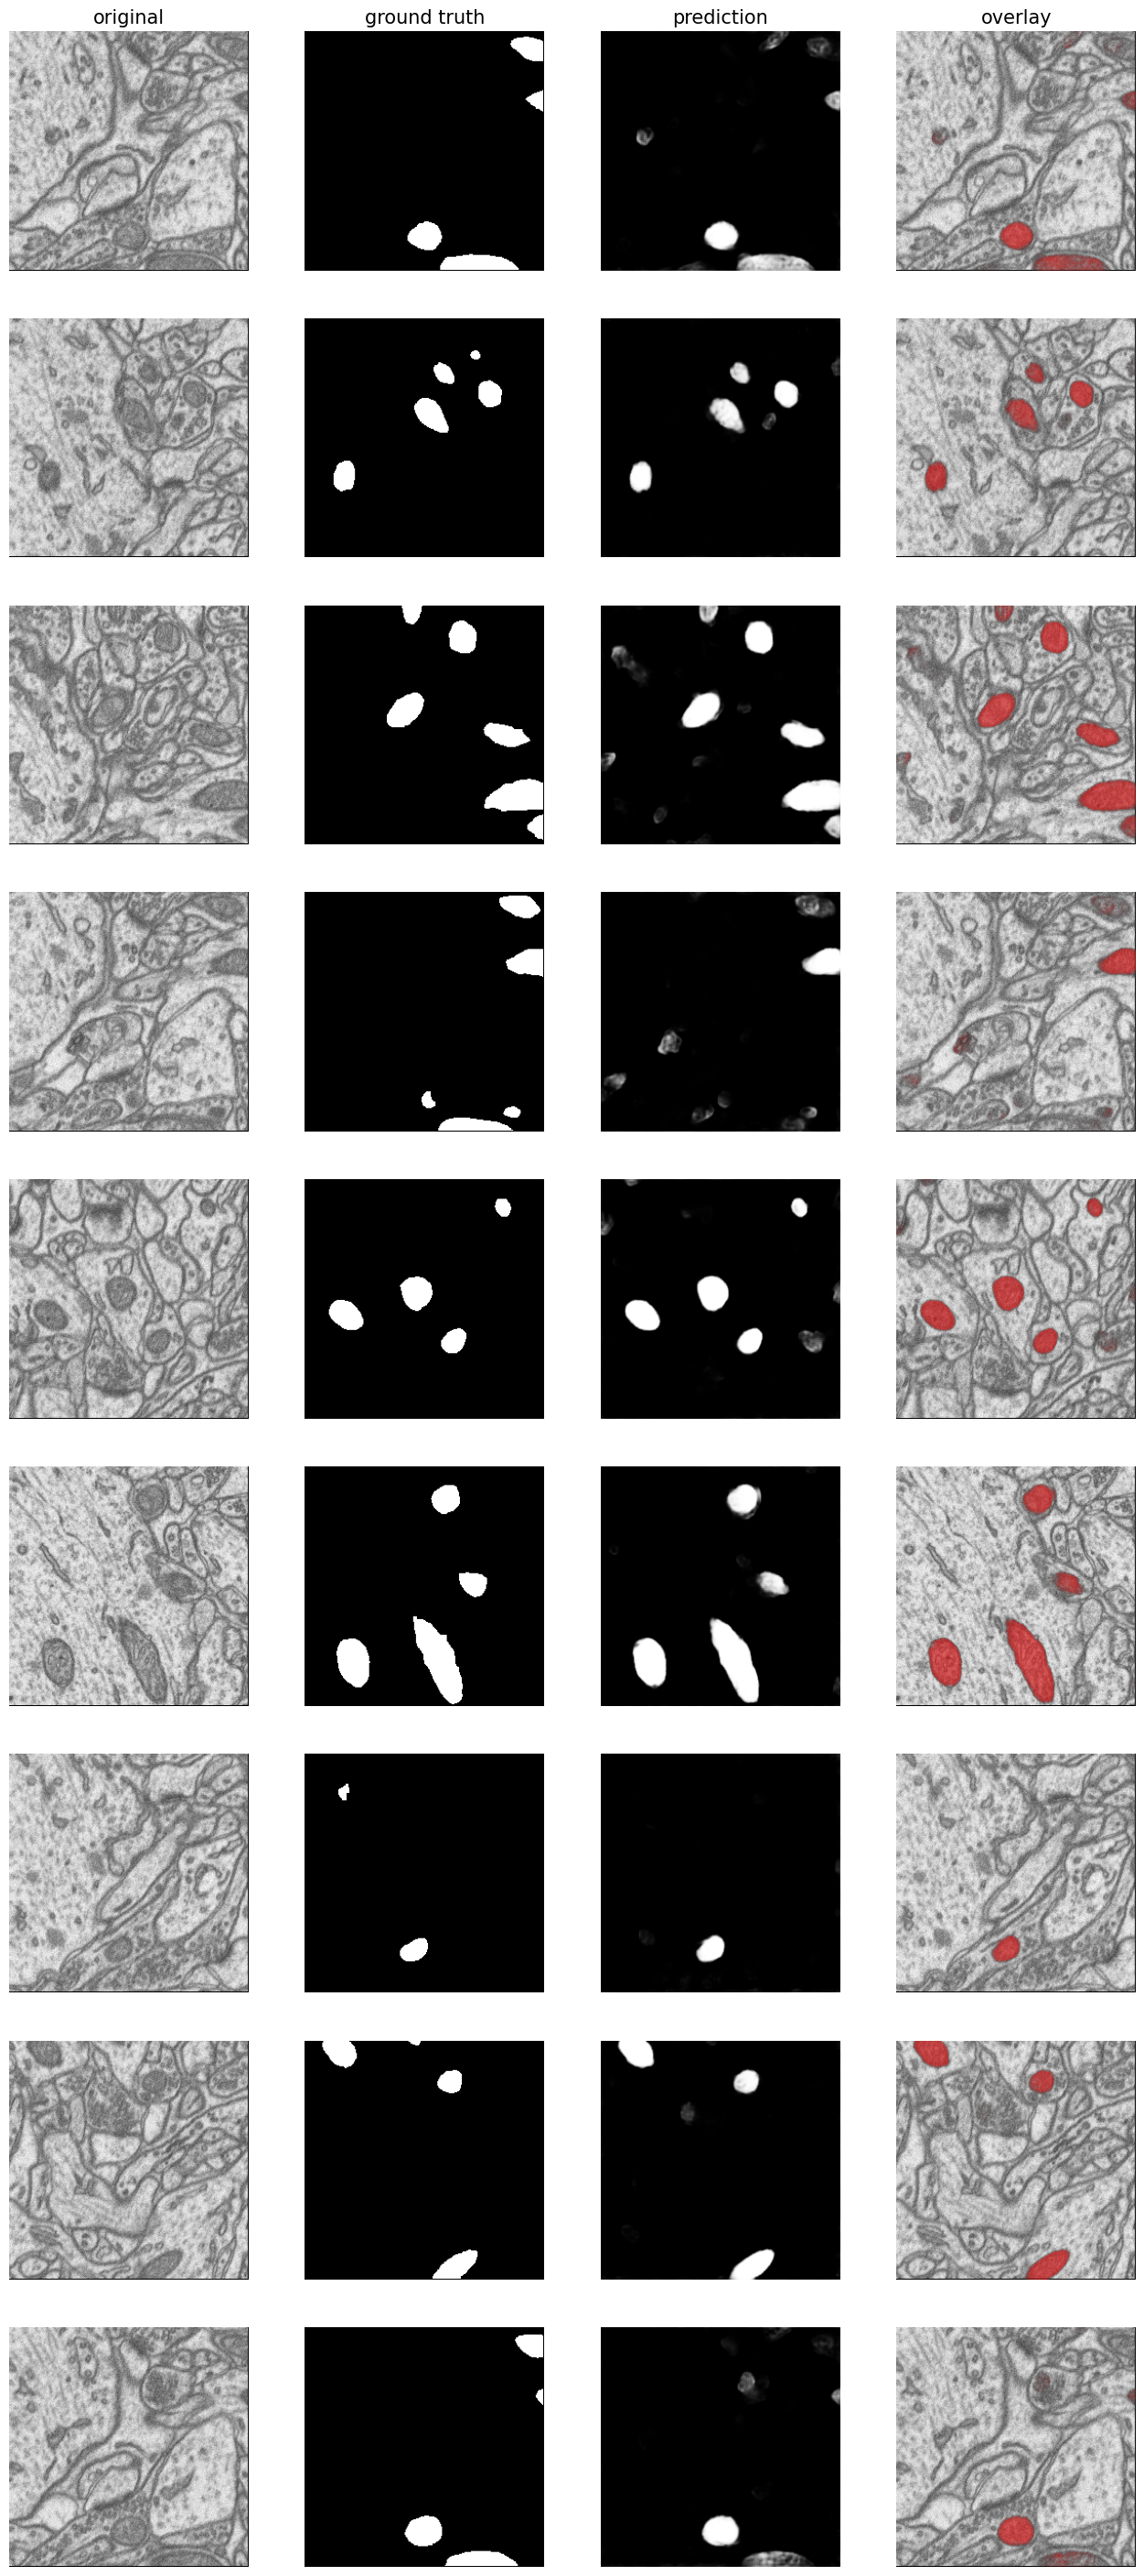

In [72]:
# ...and look at some results.
plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=9)

In [73]:
import sklearn.metrics

In [74]:
# Let's use the Jaccard score to compare a thresholded
# y_pred to the groundtruth y_test.
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.5).ravel())

0.8368265429228698

In [75]:
# TODO: What is the difference between Jaccard Score and Intersect-over-Union from above?
# TODO: YOUR_ANSWER 

The Jaccard score is more sensitive to the size of the segmented regions, while the IoU is more sensitive to the overlap between the segmented regions. 

ref: google bard

In [76]:
# TODO: Did the U-Net perform well on X_test?
# TODO: YOUR_ANSWER

Not very well, but with the change in data or increasing the training frequency might improve it.

## 4. Combine U-Net with SAM (10 points)

In [77]:
# Instead of running SAM in auto mode without seeds (Task 1), we will now
# use the U-Net predictions on X_test to seed the SAM model.

In [78]:
# We can use the following convenience functions
# to 1) convert mahotas bounding boxes to SAM format
# and 2) combine the SAM output tensors to a mask.

In [79]:
def mahotas_bbox_to_sam(bbs):

  new_bbs = []

  for i,bb in enumerate(bbs):
    # from (y1, y2, x1, x2)
    # to (x1, y1, x2, y2)
    if i == 0:
      continue
    new_bb = [bb[2], bb[0], bb[3], bb[1]]
    new_bbs.append(new_bb)

  return new_bbs

In [80]:
def sam_to_mask(results):

  results = results.cpu() # copy back to cpu land

  mask = np.array(results[0,0])

  for s in results:
    mask[s[0] == 1] = 1

  return mask

In [81]:
# The following code combines the U-Net predictions with SAM.
#
# TODO: Please study the code and answer the TODOs in-line.

In [82]:
y_pred_sam = y_pred.copy()
y_pred_sam[:] = 0

for z,img in enumerate(X_test):

  # TODO: EXPLAIN CODE BELOW
  mh.imsave('test.png', (img[:,:,0]*255).astype(np.uint8))
  # The code saves an image as test.png it also creates the scaling of values from 0-255 and saved to the uint8 dtype.

  # TODO: EXPLAIN CODE BELOW
  pred = (y_pred[z] > 0.5)
  #Here the thereshold values are being modified, all the values above 0.5 set to 1 and the rest to 0. this creates a binary mask.

  # TODO: EXPLAIN CODE BELOW
  pred, _ = mh.labeled.label(pred)
  #connected component labeling to the binary mask 'pred', grouping connected pixels into distinct objects. 
  #The resulting pred array is an integer-valued label matrix, where each connected component is assigned a unique integer label.
  # The ' _ 'variable is ignored
  
  # TODO: EXPLAIN CODE BELOW
  bbs = mh.labeled.bbox(pred)
  #calculates the bounding boxes of each connected component in the label matrix pred. 

  # TODO: EXPLAIN CODE BELOW
  bbs_converted = mahotas_bbox_to_sam(bbs)
  #converts the bounding box coordinates from the format used by the Mahotas library to the format used by the SAM segmentation tool.

  # TODO: EXPLAIN CODE BELOW
  results = SegManualMaskPredictor().image_predict(
      source="test.png",
      model_type="vit_l", # vit_l, vit_h, vit_b
      input_box=bbs_converted, 
      multimask_output=False,
      random_color=False,
      show=False,
      save=False,
  )
  #Here we are runnin the sam in manual prediction, with no random colors and model type vit_l and other tunable variables.

  # TODO: EXPLAIN CODE BELOW
  sam_and_unet_pred = sam_to_mask(results)
  #converts the segmentation masks returned by the SAM tool (results) to the same shape as the original input image. 

  # TODO: EXPLAIN CODE BELOW
  y_pred_sam[z,:,:,0] = sam_and_unet_pred
 # updates the predicted output y_pred_sam at slice z with the segmentation masks predicted by the SAM tool 


vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l mo

## 5. Compare U-Net vs. U-Net+SAM. (10 points)

In [83]:
# U-Net performance on X_test (from Task 3)
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.5).ravel())

0.8368265429228698

In [84]:
# U-Net + SAM performance on X_test
sklearn.metrics.jaccard_score(y_test.ravel(), y_pred_sam.ravel())

0.8368677453420721

In [85]:
# TODO: Please explain the results - is U-Net+SAM a good addition?
# TODO: YOUR_ANSWER

Based on the above score comparision it seems like the U-Net+SAM performance came down. I think both of them has different kind of approaches in the segmentation area. So working them independently gave a better score i guess.

## Bonus: Improve the results. (33 points)

In [86]:
# Please improve the results of U-Net+SAM and show the improved Jaccard score.

In [87]:
# TODO: YOUR_CODE

y_pred_sam = y_pred.copy()
y_pred_sam[:] = 0

for z,img in enumerate(X_test):

  # TODO: EXPLAIN CODE BELOW
  mh.imsave('test.png', (img[:,:,0]*255).astype(np.uint8))
  # The code saves an image as test.png it also creates the scaling of values from 0-255 and saved to the uint8 dtype.

  # TODO: EXPLAIN CODE BELOW
  pred = (y_pred[z] > 0.5)
  #Here the thereshold values are being modified, all the values above 0.5 set to 1 and the rest to 0. this creates a binary mask.

  # TODO: EXPLAIN CODE BELOW
  pred, _ = mh.labeled.label(pred)
  #connected component labeling to the binary mask 'pred', grouping connected pixels into distinct objects. 
  #The resulting pred array is an integer-valued label matrix, where each connected component is assigned a unique integer label.
  # The ' _ 'variable is ignored
  
  # TODO: EXPLAIN CODE BELOW
  bbs = mh.labeled.bbox(pred)
  #calculates the bounding boxes of each connected component in the label matrix pred. 

  # TODO: EXPLAIN CODE BELOW
  bbs_converted = mahotas_bbox_to_sam(bbs)
  #converts the bounding box coordinates from the format used by the Mahotas library to the format used by the SAM segmentation tool.

  # TODO: EXPLAIN CODE BELOW
  results = SegManualMaskPredictor().image_predict(
      source="test.png",
      model_type="vit_l", # vit_l, vit_h, vit_b
      input_box=bbs_converted, 
      multimask_output=False,
      random_color=False,
      show=False,
      save=False,
  )
  #Here we are runnin the sam in manual prediction, with no random colors and model type vit_l and other tunable variables.

  # TODO: EXPLAIN CODE BELOW
  sam_and_unet_pred = sam_to_mask(results)
  #converts the segmentation masks returned by the SAM tool (results) to the same shape as the original input image. 

  # TODO: EXPLAIN CODE BELOW
  y_pred_sam[z,:,:,0] = sam_and_unet_pred
 # updates the predicted output y_pred_sam at slice z with the segmentation masks predicted by the SAM tool 

vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l mo

In [88]:
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.6).ravel())

0.8232196651686503

In [89]:
sklearn.metrics.jaccard_score(y_test.ravel(), y_pred_sam.ravel())

0.8368677453420721

In [90]:
# collaborated by Sneha Nimmala

In [91]:
#
# You made it!!
#
#                 _ ___                /^^\ /^\  /^^\_
#     _          _@)@) \            ,,/ '` ~ `'~~ ', `\.
#   _/o\_ _ _ _/~`.`...'~\        ./~~..,'`','',.,' '  ~:
#  / `,'.~,~.~  .   , . , ~|,   ,/ .,' , ,. .. ,,.   `,  ~\_
# ( ' _' _ '_` _  '  .    , `\_/ .' ..' '  `  `   `..  `,   \_
#  ~V~ V~ V~ V~ ~\ `   ' .  '    , ' .,.,''`.,.''`.,.``. ',   \_
#   _/\ /\ /\ /\_/, . ' ,   `_/~\_ .' .,. ,, , _/~\_ `. `. '.,  \_
#  < ~ ~ '~`'~'`, .,  .   `_: ::: \_ '      `_/ ::: \_ `.,' . ',  \_
#   \ ' `_  '`_    _    ',/ _::_::_ \ _    _/ _::_::_ \   `.,'.,`., \-,-,-,_,_,
#    `'~~ `'~~ `'~~ `'~~  \(_)(_)(_)/  `~~' \(_)(_)(_)/ ~'`\_.._,._,'_;_;_;_;_;
#